# Get data

## Install and import

In [1]:
!pip install -q easysnowdata

In [2]:
import pandas as pd
import geopandas as gpd
import rasterio as rio
import matplotlib.pyplot as plt
import easysnowdata
import folium
import earthaccess

## Define area of interest bounding box

In [3]:
bbox_gdf = gpd.read_file('grand_mesa.geojson')

In [4]:
bbox_gdf.explore()

## SNOTEL automatic weather stations

In [5]:
station_collection = easysnowdata.automatic_weather_stations.StationCollection(sortby_dist_to_geom=bbox_gdf)

Sorting by distance to given geometry. See dist_km column.
Geodataframe with all stations has been added to the Station object. Please use the .all_stations attribute to access.
Use the .get_data(stations=geodataframe/string/list,variables=string/list,start_date=str,end_date=str) method to fetch data for specific stations and variables.


In [6]:
station_collection.all_stations

name network  elevation_m   latitude   longitude  \
code                                                                         
682_CO_SNTL     Park Reservoir  SNOTEL  3035.808105  39.046440 -107.874138   
622_CO_SNTL         Mesa Lakes  SNOTEL  3048.000000  39.058311 -108.058350   
675_CO_SNTL      Overland Res.  SNOTEL  2999.231934  39.090561 -107.634720   
618_CO_SNTL      Mc Clure Pass  SNOTEL  2895.600098  39.128971 -107.288063   
669_CO_SNTL   North Lost Trail  SNOTEL  2804.159912  39.078129 -107.143890   
...                        ...     ...          ...        ...         ...   
1072_AK_SNTL         Kantishna  SNOTEL   472.440002  63.541672 -150.994003   
1266_AK_SNTL    Telaquana Lake  SNOTEL   388.619995  60.982430 -153.917725   
958_AK_SNTL           Coldfoot  SNOTEL   316.992004  67.253326 -150.182999   
1182_AK_SNTL     Bettles Field  SNOTEL   195.072006  66.916672 -151.533325   
1175_AK_SNTL     Kelly Station  SNOTEL    94.487999  67.933327 -162.283325   

                 state           HUC   mgrs             mountainRange  \
code                                                                    
682_CO_SNTL   Colorado  140200050111  13SBD  Southern Rocky Mountains   
622_CO_SNTL   Colorado  140100051307  12SYJ  Southern Rocky Mountains   
675_CO_SNTL   Colorado  140200040101  13SBD  Southern Rocky Mountains   
618_CO_SNTL   Colorado  140200040203  13SCD  Southern Rocky Mountains   
669_CO_SNTL   Colorado  140100040703  13SCD  Southern Rocky Mountains   
...                ...           ...    ...                       ...   
1072_AK_SNTL    Alaska  190803101805  05VNL              Alaska Range   
1266_AK_SNTL    Alaska  190304052303  05VMH              Alaska Range   
958_AK_SNTL     Alaska  190901010604  05WPQ                      None   
1182_AK_SNTL    Alaska  190901012604  05WNQ                      None   
1175_AK_SNTL    Alaska  190504030802  03WXR                      None   

              beginDate    endDate  csvData                     geometry  \
code                                                                       
682_CO_SNTL  1978-10-01 2024-08-18     True  POINT (-107.87414 39.04644)   
622_CO_SNTL  1985-10-01 2024-08-18     True  POINT (-108.05835 39.05831)   
675_CO_SNTL  1988-10-01 2024-08-18     True  POINT (-107.63472 39.09056)   
618_CO_SNTL  1979-10-01 2024-08-18     True  POINT (-107.28806 39.12897)   
669_CO_SNTL  1984-10-01 2024-08-18     True  POINT (-107.14389 39.07813)   
...                 ...        ...      ...                          ...   
1072_AK_SNTL 2004-10-01 2024-08-18     True    POINT (-150.994 63.54167)   
1266_AK_SNTL 2014-07-09 2024-08-18     True  POINT (-153.91772 60.98243)   
958_AK_SNTL  1994-10-01 2024-08-18     True    POINT (-150.183 67.25333)   
1182_AK_SNTL 1980-10-01 2024-08-18     True  POINT (-151.53333 66.91667)   
1175_AK_SNTL 1991-10-01 2024-08-18     True  POINT (-162.28333 67.93333)   

                  dist_km  
code                       
682_CO_SNTL      0.000000  
622_CO_SNTL      0.000000  
675_CO_SNTL      0.000000  
618_CO_SNTL     29.604227  
669_CO_SNTL     42.207741  
...                   ...  
1072_AK_SNTL  3919.934020  
1266_AK_SNTL  3977.703086  
958_AK_SNTL   4061.376571  
1182_AK_SNTL  4098.124943  
1175_AK_SNTL  4584.091428  

[969 rows x 14 columns]

In [26]:
m = folium.Map([39,-108.05])
bbox_gdf.explore(m=m)
station_collection.all_stations.explore(column='dist_km',m=m)

In [8]:
grand_mesa_station_list = ['622_CO_SNTL','682_CO_SNTL','675_CO_SNTL']
station_collection.get_data(grand_mesa_station_list,variables=['WTEQ'])

100%|██████████| 3/3 [00:00<00:00, 10.68it/s]
/srv/conda/envs/notebook/lib/python3.11/site-packages/easysnowdata/automatic_weather_stations.py:257: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  all_stations_ds = all_stations_ds.assign_coords(
/srv/conda/envs/notebook/lib/python3.11/site-packages/easysnowdata/automatic_weather_stations.py:257: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This

WTEQ dataframe has been added to the Station object. Please use the .WTEQ attribute to access the dataframe.
Full ['WTEQ'] dataset has been added to the station object. Please use the .data attribute to access the dataset.


In [9]:
f,ax=plt.subplots()
station_collection.WTEQ.loc[slice('2022-10-01','2023-09-30')].plot(ax=ax)
ax.set_ylabel('SWE [m]')
ax.set_title('WY2023 SWE at 3 SNOTEL stations near Grand Mesa, CO')

Text(0.5, 1.0, 'WY2023 SWE at 3 SNOTEL stations near Grand Mesa, CO')

## Sentinel-1 RTC

In [10]:
s1 = easysnowdata.remote_sensing.Sentinel1(
    bbox_input=bbox_gdf, start_date="2022-04-01", end_date="2022-04-30", resolution=80, remove_border_noise=False,
)

Data searched. Access the returned seach with the .search attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 13N.
Metadata retrieved. Access with the .metadata attribute.
Added relative orbit number and orbit state as coordinates to the data.
Linear power units converted to dB. Convert back to linear power units using the .db_to_linear() method.


In [11]:
s1.data

<xarray.Dataset> Size: 19MB
Dimensions:             (y: 592, x: 822, time: 5)
Coordinates:
  * y                   (y) float64 5kB 4.346e+06 4.346e+06 ... 4.298e+06
  * x                   (x) float64 7kB 2.075e+05 2.076e+05 ... 2.732e+05
    spatial_ref         int32 4B 32613
  * time                (time) datetime64[ns] 40B 2022-04-06T13:10:24.992039 ...
    sat:orbit_state     (time) object 40B 'descending' ... 'descending'
    sat:relative_orbit  (time) int16 10B 56 129 56 129 56
Data variables:
    vh                  (time, y, x) float32 10MB dask.array<chunksize=(1, 592, 822), meta=np.ndarray>
    vv                  (time, y, x) float32 10MB dask.array<chunksize=(1, 592, 822), meta=np.ndarray>
Attributes:
    units:    dB

In [12]:
f = s1.data['vv'].plot.imshow(col='time',col_wrap=6, vmin=-15, vmax=2, cmap='gray')

for ax, time, in zip(f.axs.flat, s1.data['vv'].time.values):
    local_time = pd.to_datetime(time).tz_localize('UTC').tz_convert('America/Boise')
    ax.set_title(f'{local_time.strftime("%B %d, %Y")}\n{local_time.strftime("%I:%M%p")}')
    ax.axis('off')
    ax.set_aspect('equal')

f.fig.suptitle('Sentinel-1 RTC backscatter time series',fontsize=16,y=1.02)

/srv/conda/envs/notebook/lib/python3.11/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


Text(0.5, 1.02, 'Sentinel-1 RTC backscatter time series')

## Sentinel-2

In [13]:
s2 = easysnowdata.remote_sensing.Sentinel2(
    bbox_input=bbox_gdf,
    start_date="2022-04-01",
    end_date="2022-04-30",
    resolution=40,
    catalog_choice="planetarycomputer",
)

Data searched. Access the returned seach with the .search attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 13N.
Nodata values removed from the data. In doing so, all bands converted to float32. To turn this behavior off, set remove_nodata=False.
Data acquired after January 25th, 2022 harmonized to old baseline. To turn this behavior off, set harmonize_to_old=False.
Data scaled to reflectance. To turn this behavior off, set scale_data=False.
Metadata retrieved. Access with the .metadata attribute.


In [14]:
s2.data

<xarray.Dataset> Size: 1GB
Dimensions:      (time: 12, y: 1183, x: 1642)
Coordinates:
  * y            (y) float64 9kB 4.346e+06 4.346e+06 ... 4.298e+06 4.298e+06
  * x            (x) float64 13kB 2.075e+05 2.075e+05 ... 2.731e+05 2.731e+05
    spatial_ref  int32 4B 32613
  * time         (time) datetime64[ns] 96B 2022-04-01T17:49:09.024000 ... 202...
Data variables: (12/16)
    coastal      (time, y, x) float32 93MB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    blue         (time, y, x) float32 93MB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    green        (time, y, x) float32 93MB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    red          (time, y, x) float32 93MB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    rededge      (time, y, x) float32 93MB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    rededge2     (time, y, x) float32 93MB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    ...           ...
    swir16       (time, y, x) float32 93MB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    swir22       (time, y, x) float32 93MB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    aot          (time, y, x) float32 93MB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    scl          (time, y, x) float32 93MB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    wvp          (time, y, x) float32 93MB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    visual       (time, y, x) float32 93MB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
Attributes:
    band_info:       {'B01': {'name': 'coastal', 'description': 'Coastal aero...
    scl_class_info:  {0: {'name': 'No Data (Missing data)', 'color': '#000000...

In [15]:
s2.get_rgb()

RGB data retrieved. Access with the .rgb attribute, or .rgb_norm for normalized RGB.


Text(0.5, 1.02, 'Sentinel-2 RGB')

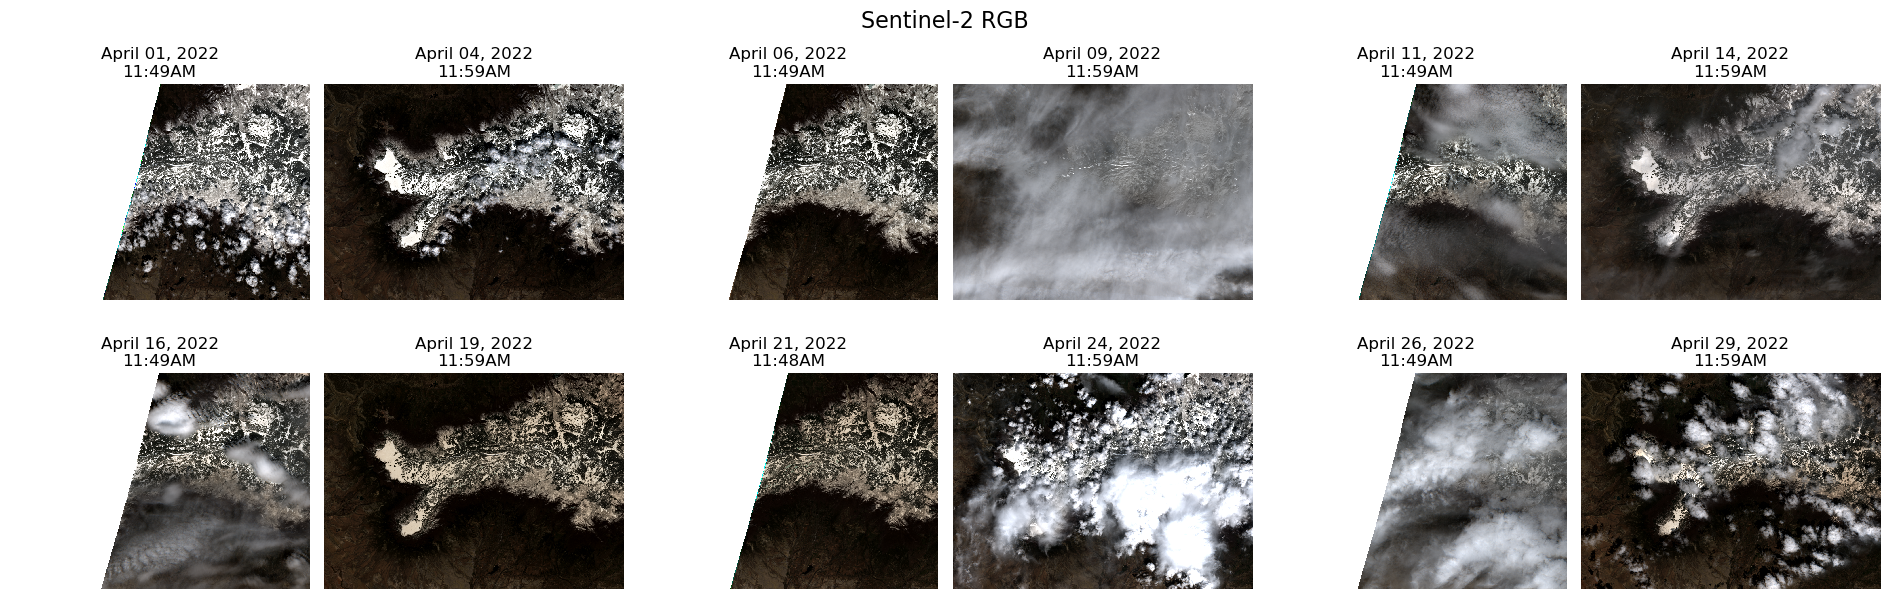

In [16]:
f = s2.rgb.plot.imshow(col='time',col_wrap=6, robust=True)

for ax, time, in zip(f.axs.flat, s2.rgb.time.values):
    local_time = pd.to_datetime(time).tz_localize('UTC').tz_convert('America/Boise')
    ax.set_title(f'{local_time.strftime("%B %d, %Y")}\n{local_time.strftime("%I:%M%p")}')
    ax.axis('off')
    ax.set_aspect('equal')
    
f.fig.tight_layout()

f.fig.suptitle('Sentinel-2 RGB', fontsize=16, y=1.02)

## MODIS MOD10A1

In [17]:
mod10a1 = easysnowdata.remote_sensing.MODIS_snow(bbox_gdf, start_date='2022-04-01', end_date='2022-04-30', data_product='MOD10A1')

Data retrieved. Access with the .data attribute.


In [18]:
f= mod10a1.data['NDSI_Snow_Cover'].rio.reproject_match(s2.data, resampling=rio.enums.Resampling.nearest).where(lambda x: x <= 100).plot.imshow(
    col="time", col_wrap=6, vmin=0, vmax=100, cmap='Blues'
)

for ax, time, in zip(f.axs.flat, mod10a1.data.time.values):
    ax.set_title(f'{pd.to_datetime(time).strftime("%B %d, %Y")}')
    ax.axis('off')
    ax.set_aspect('equal')

f.fig.suptitle('MODIS MOD10A1 daily NDSI snow cover',fontsize=16,y=1.02)

Text(0.5, 1.02, 'MODIS MOD10A1 daily NDSI snow cover')

## MODIS MOD10A1F

In [19]:
# need earthaccess login for this data
earthaccess.login()

Enter your Earthdata Login username:  egagli
Enter your Earthdata password:  ········


In [20]:
mod10a1f = easysnowdata.remote_sensing.MODIS_snow(bbox_gdf, start_date='2022-04-01', end_date='2022-04-30', data_product='MOD10A1F')

QUEUEING TASKS | :   0%|          | 0/30 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/30 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/30 [00:00<?, ?it/s]

Data retrieved. Access with the .data attribute.


In [21]:
f= mod10a1f.data.rio.reproject_match(s2.data, resampling=rio.enums.Resampling.nearest).where(lambda x: x <= 100).plot.imshow(
    col="time", col_wrap=6, vmin=0, vmax=100, cmap='Blues'
)

for ax, time, in zip(f.axs.flat, mod10a1f.data.time.values):
    ax.set_title(f'{pd.to_datetime(time).strftime("%B %d, %Y")}')
    ax.axis('off')
    ax.set_aspect('equal')

f.fig.suptitle('MODIS MOD10A1F cloud-gap-filled NDSI snow cover',fontsize=16,y=1.02)

Text(0.5, 1.02, 'MODIS MOD10A1F cloud-gap-filled NDSI snow cover')

## UCLA SWE reanalysis

In [22]:
snow_reanalysis_da = easysnowdata.hydroclimatology.get_ucla_snow_reanalysis(
    bbox_gdf,
    start_date="2021-04-01",
    end_date="2021-04-30",
    variable="SWE_Post",
    stats="mean",
)

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [23]:
snow_reanalysis_da.plot.imshow(
    col="time",
    col_wrap=5,
    cmap="Blues",
    vmin=0,
    vmax=1,
)